## Project 3: Applications of Dictionary 

CS 109, Fall 2021 <br>
Dr. Kell

Author: Muhammad Haris Iqbal <br>

12/20/2021


### Overview

In this project, you'll process and analyze the table contained in the file <code>indicators.csv</code>, which contains real data on indicators of economic well-being for world countries. In particular, the table contains the following fields (each corresponding to a column in the table):

* <code>code:</code> the unique international three-character code for the country. 
* <code>year:</code> the year the data in the row corresponds to. 
* <code>country:</code> the English name of the country including spaces and capitalization.
* <code>pop:</code> the population of the country, in units of millions of people. 
* <code>gdp:</code> the gross domestic product of the country, measured in units of billions of US dollars.
* <code>life:</code>the life expectancy of the country, in years.
* <code>cell:</code> the number of cell phone subscribers in the country, in millions of subscribers. 

In other words, each row contains indicator data (specified by <code>pop</code> <code>gdp</code>, <code>life</code>, and <code>cell</code>) given for a particular year (specified by <code>year</code>)   for a country (specified by both <code>code</code> and <code>country</code>). Our goal in the project will be to display plots that show the countries that rank highest according to different indicator metrics.


### Part 1: Building Code to Country Name Dictionary

First, write a function called <code>codeToCountryDictionary(indicatorsFile)</code> that takes in a file object <code>codeToCountryDictionary(indicatorsFile)</code> that builds a dictionary whose keys are the country codes (given by the <code>code</code> column) that maps to the country name (given by the <code>country</code> field). For example, your dictionary should map the code <code>"USA"</code> to <code>"United States"</code>, both represented as strings.

Some things to keep in mind:
* Some country names contain commas in them (e.g., "Macedonia, FYR"), which will throw off the method we saw in class for splitting lines based on comma characters. Therefore for simplicity, you may discard all countries that contain commas in their names (i.e., they do not need to appear in your dictionary, and so you should have your code skip over such rows using a conditional check). 

* At the beginning of the function, you should call <code>indicatorsFile.seek(0)</code> to reset the file head to the beginning of the file.

In [2]:
CODE = 0
YEAR = 1
COUNTRY = 2
POP = 3
GDP = 4
LIFE = 5
CELL = 6

def codeToCountryDictionary(indicatorsFile): 
    '''
    Given a file object corresponding to indicators file, return a dictionary 
    whose keys are the country codes that maps to the country name.
    
    Parameters: file object indicatorsFile represent real data
    on indicators of economic well-being for world countries. 
    
    Returns: dictionary that maps country codes to the country name.
    '''
    indicatorsFile.seek(0)
    myDict = {} 
    
    header = indicatorsFile.readline()   
    numCols = len(header.split(","))
    
    for num in indicatorsFile:
        splitNum = num.split(",")
        if len(splitNum) ==  numCols and ',' not in splitNum[COUNTRY]:  
           
            numCode = str(splitNum[CODE])
            numCountry = str(splitNum[COUNTRY])

            if numCode not in myDict:
                myDict[numCode] = None
            myDict[numCode] = numCountry
                
    return myDict
        

def main():
    filename = "indicators.csv"
    indicatorsFile = open(filename, "r", encoding = "utf-8")
    
    ctcDict = codeToCountryDictionary(indicatorsFile)
    print(ctcDict)
    indicatorsFile.close()
    
main()

{'ABW': 'Aruba', 'AFG': 'Afghanistan', 'AGO': 'Angola', 'ALB': 'Albania', 'AND': 'Andorra', 'ARE': 'United Arab Emirates', 'ARG': 'Argentina', 'ARM': 'Armenia', 'ASM': 'American Samoa', 'ATG': 'Antigua and Barbuda', 'AUS': 'Australia', 'AUT': 'Austria', 'AZE': 'Azerbaijan', 'BDI': 'Burundi', 'BEL': 'Belgium', 'BEN': 'Benin', 'BFA': 'Burkina Faso', 'BGD': 'Bangladesh', 'BGR': 'Bulgaria', 'BHR': 'Bahrain', 'BIH': 'Bosnia and Herzegovina', 'BLR': 'Belarus', 'BLZ': 'Belize', 'BMU': 'Bermuda', 'BOL': 'Bolivia', 'BRA': 'Brazil', 'BRB': 'Barbados', 'BRN': 'Brunei Darussalam', 'BTN': 'Bhutan', 'BWA': 'Botswana', 'CAF': 'Central African Republic', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHI': 'Channel Islands', 'CHL': 'Chile', 'CHN': 'China', 'CIV': "Cote d'Ivoire", 'CMR': 'Cameroon', 'COL': 'Colombia', 'COM': 'Comoros', 'CPV': 'Cabo Verde', 'CRI': 'Costa Rica', 'CUB': 'Cuba', 'CUW': 'Curacao', 'CYM': 'Cayman Islands', 'CYP': 'Cyprus', 'CZE': 'Czech Republic', 'DEU': 'Germany', 'DJI': 'Djibouti

### Part 2: Building Dictionaries for Average Life Expectancy and GDP per Capita
Next, you'll write two functions that create dictionaries that map country codes to aggregate data from the table. In particular, write the following functions:

* <code>codeToAverageLifeExpectancy(indicatorsFile)</code>: takes in the file object <code>indicatorsFile</code> (again, corresponding to the indicators table) and creates a dictionary that maps country codes to the average life expectancy over all years shown in the table. For example, your dictionary should map <code>"USA"</code> to a float value that is roughly 74.60. Interpreted, this means the average life expectancy for all entries in the table for USA (from 1960 to 2016) was 74.60 years.

* <code>codeToAverageGdpPerPop(indicatorsFile)</code>: takes in the file object <code>indicatorsFile</code> and creates a dictionary that maps country codes to the average life expectancy over all years shown in the table. For example, your dictionary should map <code>"USA"</code> to a float value that is roughly 24.17 (which based on the units specified above, translates to an average GDP of 24,170 dollars per person).

Things to keep in mind:
* Like in the previous part, discard all countries that contain commas in their names, and at the beginning of the function, you should call <code>indicatorsFile.seek(0)</code> to reset the file head. 

* Some countries do not contain information for life expectancy, population, or gdp (when your read these missing values, they will appear as the empty string). You should skip over such rows (using a conditional check) when reading the file and not consider them in your averages.


In [3]:
CODE = 0
YEAR = 1
COUNTRY = 2
POP = 3
GDP = 4
LIFE = 5
CELL = 6

def codeToAverageLifeExpectancy(indicatorsFile):
    '''
    Given a file object indicators file, creates a dictionary that maps
    country codes to the average life expectancy over all years shown in the table.
    
    Parameters: file object indicatorsFile represent real data
    on indicators of economic well-being for world countries. 
    
    Return: dictionary that maps country codes to the average life expectancy over all years.
    '''
    indicatorsFile.seek(0)
    myDict = {} 
    count = {}
    sumLife={}
    
    header = indicatorsFile.readline()   
    numCols = len(header.split(","))
    
    for num in indicatorsFile:
        splitNum = num.split(",")
        numCode = str(splitNum[CODE])
        if len(splitNum) == numCols and ',' not in splitNum[COUNTRY] and splitNum[LIFE]!='':
            
            life = float(splitNum[LIFE])
            if numCode not in count:
                count[numCode]=1
                sumLife[numCode]=life
            else:
                count[numCode]+=1
                sumLife[numCode]+=life
  
            myDict[numCode] = round(sumLife[numCode]/count[numCode],2)

    return myDict
            
            
                
            
                
def codeToAverageGdpPerPop(indicatorsFile):
    '''
    Given a file object indicators file, creates a dictionary that maps
    country codes to the average gdp per population over all years shown in the table.
    
    Parameters: file object indicatorsFile represent real data
    on indicators of economic well-being for world countries. 
    
    Return: dictionary that maps country codes to the average gdp per population over all years.
    '''
    indicatorsFile.seek(0)
    myDict = {} 
    count = {}
    sumGdp={}
    
    header = indicatorsFile.readline()   
    numCols = len(header.split(","))
    
    for num in indicatorsFile:
        splitNum = num.split(",")
        numCode = str(splitNum[CODE])
        
        if len(splitNum) == numCols and ',' not in splitNum[COUNTRY] and splitNum[GDP]!=''and splitNum[POP]!='':
            
            gdp = float(splitNum[GDP])/float(splitNum[POP])
            if numCode not in myDict:
                myDict[numCode]=1
                count[numCode]=gdp
            else:
                myDict[numCode]+=1
                count[numCode]+=gdp
  
            sumGdp[numCode] = round(count[numCode]/myDict[numCode],2)

    return sumGdp      
    

    
def main():
    filename = "indicators.csv"
    indicatorsFile = open(filename, "r", encoding = "utf-8")
    
    dict_1 = codeToAverageLifeExpectancy(indicatorsFile)
    dict_2 = codeToAverageGdpPerPop(indicatorsFile) 
    print(dict_1, '\n')
    print(dict_2)
    indicatorsFile.close()
    
main()   

{'ABW': 72.21, 'AFG': 47.88, 'AGO': 44.29, 'ALB': 71.34, 'ARE': 68.91, 'ARG': 70.93, 'ARM': 70.45, 'ATG': 70.37, 'AUS': 76.29, 'AUT': 74.96, 'AZE': 65.69, 'BDI': 48.65, 'BEL': 75.29, 'BEN': 50.52, 'BFA': 47.49, 'BGD': 58.18, 'BGR': 71.71, 'BHR': 69.68, 'BIH': 70.73, 'BLR': 69.95, 'BLZ': 68.15, 'BMU': 77.96, 'BOL': 54.7, 'BRA': 65.26, 'BRB': 70.07, 'BRN': 71.66, 'BTN': 52.01, 'BWA': 56.98, 'CAF': 45.55, 'CAN': 76.66, 'CHE': 77.24, 'CHI': 75.39, 'CHL': 70.9, 'CHN': 66.28, 'CIV': 47.9, 'CMR': 50.37, 'COL': 67.01, 'COM': 53.86, 'CPV': 63.15, 'CRI': 73.04, 'CUB': 73.95, 'CUW': 76.39, 'CYM': 82.19, 'CYP': 75.8, 'CZE': 72.84, 'DEU': 74.9, 'DJI': 54.54, 'DMA': 73.98, 'DNK': 75.48, 'DOM': 65.41, 'DZA': 62.72, 'ECU': 66.53, 'ERI': 50.62, 'ESP': 76.45, 'EST': 70.72, 'ETH': 48.95, 'FIN': 74.83, 'FJI': 64.36, 'FRA': 76.14, 'FRO': 78.45, 'GAB': 55.64, 'GBR': 75.61, 'GEO': 69.89, 'GHA': 54.63, 'GIN': 46.39, 'GNB': 47.95, 'GNQ': 47.29, 'GRC': 75.43, 'GRD': 67.8, 'GRL': 66.58, 'GTM': 61.15, 'GUM': 71.2

### Part 3: Plotting Top 50 Countries for Highest Life Expectancy and GDP per Capita Averages

Using the functions you wrote from Part 1 and 2, implement the <code>main()</code> function below that should generate two bar graphs, one that shows the top 50 countires based average life expectancy, and another that shows the top 50 countries based on average GDP per captia. To aid you in displaying the plot, you have been given two functions, <code>rankedKeys()</code> and <code>plotBarGraph()</code>. Read their docstrings to understand what each function does, and then use them to generate your bar graphs.

<i> Hint: First, generate the dictionaries using your functions from Part 1 and Part 2. Then, use the rankedKeys() function to generate a list of country codes ranked based on the metric corresponding to the dictionary you pass in. Then, use loops to generate an xlabel list with country names, and y value list for the values for each metric. Once you've generated these lists, call the <code>plotBarGraph()</code> function to generate the plots.</i>


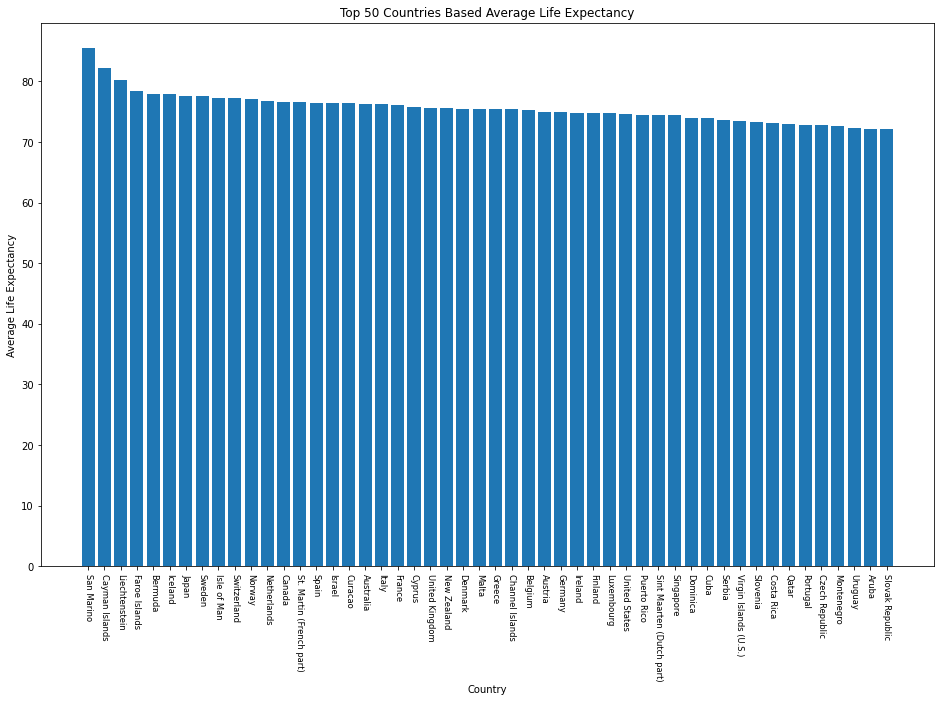

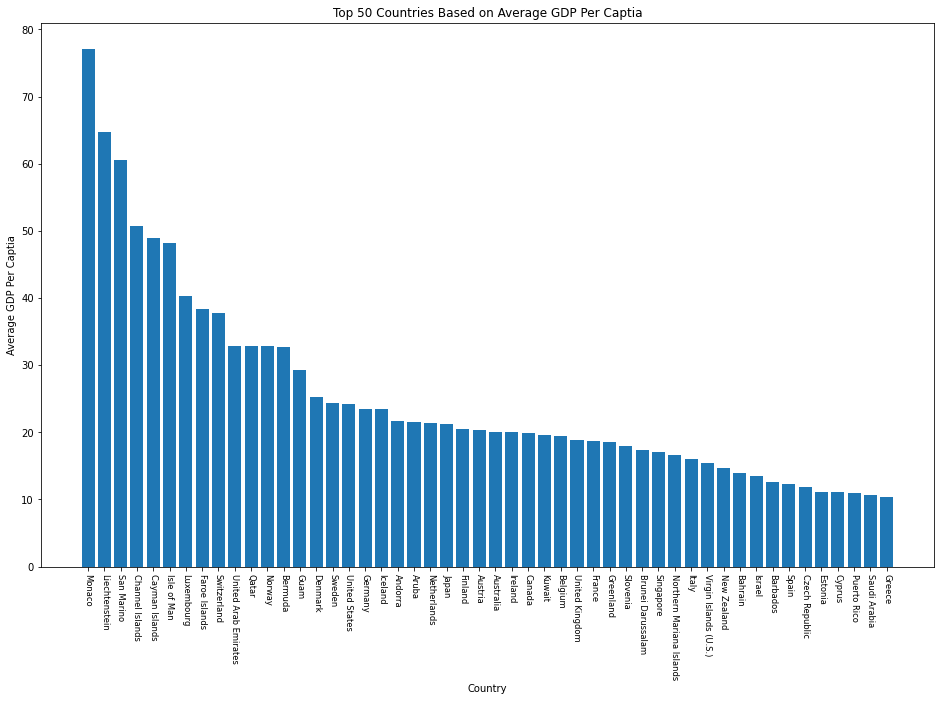

In [6]:
import matplotlib.pyplot as pyplot

CODE = 0
YEAR = 1
COUNTRY = 2
POP = 3
GDP = 4
LIFE = 5
CELL = 6

def codeToCountryDictionary(indicatorsFile): 
    '''
    Given a file object corresponding to indicators file, return a dictionary 
    whose keys are the country codes that maps to the country name.
    
    Parameters: file object indicatorsFile represent real data
    on indicators of economic well-being for world countries. 
    
    Returns: dictionary that maps country codes to the country name.
    '''
    indicatorsFile.seek(0)
    myDict = {} 
    
    header = indicatorsFile.readline()   
    numCols = len(header.split(","))
    
    for num in indicatorsFile:
        splitNum = num.split(",")
        if len(splitNum) ==  numCols and "," not in splitNum[COUNTRY]:  
           
            numCode = str(splitNum[CODE])
            numCountry = str(splitNum[COUNTRY])

            if numCode not in myDict:
                myDict[numCode] = None
            myDict[numCode] = numCountry
                
    return myDict

def codeToAverageLifeExpectancy(indicatorsFile):
    '''
    Given a file object indicators file, creates a dictionary that maps
    country codes to the average life expectancy over all years shown in the table.
    
    Parameters: file object indicatorsFile represent real data
    on indicators of economic well-being for world countries. 
    
    Return: dictionary that maps country codes to the average life expectancy over all years.
    '''
    indicatorsFile.seek(0)
    myDict = {} 
    count = {}
    sumLife={}
    
    header = indicatorsFile.readline()   
    numCols = len(header.split(","))
    
    for num in indicatorsFile:
        splitNum = num.split(",")
        numCode = str(splitNum[CODE])
        if len(splitNum) == numCols and ',' not in splitNum[COUNTRY] and splitNum[LIFE]!='':
            
            life = float(splitNum[LIFE])
            if numCode not in count:
                count[numCode]=1
                sumLife[numCode]=life
            else:
                count[numCode]+=1
                sumLife[numCode]+=life
  
            myDict[numCode] = round(sumLife[numCode]/count[numCode],2)

    return myDict
            
            
                
            
                
def codeToAverageGdpPerPop(indicatorsFile):
    '''
    Given a file object indicators file, creates a dictionary that maps
    country codes to the average gdp per population over all years shown in the table.
    
    Parameters: file object indicatorsFile represent real data
    on indicators of economic well-being for world countries. 
    
    Return: dictionary that maps country codes to the average gdp per population over all years.
    '''
    indicatorsFile.seek(0)
    myDict = {} 
    count = {}
    sumGdp={}
    
    header = indicatorsFile.readline()   
    numCols = len(header.split(","))
    
    for num in indicatorsFile:
        splitNum = num.split(",")
        numCode = str(splitNum[CODE])
        
        if len(splitNum) == numCols and ',' not in splitNum[COUNTRY] and splitNum[GDP]!=''and splitNum[POP]!='':
            
            gdp = float(splitNum[GDP])/float(splitNum[POP])
            if numCode not in myDict:
                myDict[numCode]=1
                count[numCode]=gdp
            else:
                myDict[numCode]+=1
                count[numCode]+=gdp
  
            sumGdp[numCode] = round(count[numCode]/myDict[numCode],2)

    return sumGdp      
    

def rankedKeys(numDict):
    '''
    Given a dictionary that maps keys to numerical values, 
    return a list that ranks (i.e., reverse sorted order) 
    the keys based their corresponding values in the dictionary. 
    
    Parameters: a dictionary that maps keys to numerical values.
    Return Value: a list of the keys of numDict in reverse sorted order. 
    '''
    sortedValues = []             
    for key in numDict:                    # generate (value, key) tuples 
        valKeyTuple = (numDict[key], key)
        sortedValues.append(valKeyTuple)
        
    sortedValues.sort(reverse = True)  # sort from highest to lowest 
    
    sortedKeys = []                # append keys to list based on above ordering
    for pair in sortedValues:
        sortedKeys.append(pair[1])
    return sortedKeys
        
def plotBarGraph(xlabels, yvalues, title, xaxislab, yaxislab):
    ''' 
    Function that plots a bar graph, where bars labels are specified by xlabels,
    and the height of each bar is specified by the values in ylabel.
    title, xaxislab, and yaxislab are strings that specify the title 
    and x-axis and y-axis labels of the plot.
    
    Parameters: lists xlabels and yvalues, strings title, xaxislab and yaxislab.
    Return Value: None (function generates plot described above).
    '''
    
    pyplot.figure(figsize=(16,10))
    pyplot.bar(xlabels, yvalues)
    pyplot.xticks(range(len(xlabels)), rotation = 270, fontsize = 'small')
    pyplot.title(title)
    pyplot.xlabel(xaxislab)
    pyplot.ylabel(yaxislab)
    pyplot.show()
    
def main():
    
    filename = "indicators.csv"
    indicatorsFile = open(filename, "r", encoding = "utf-8")
    
    ctcDict = codeToCountryDictionary(indicatorsFile)
    dict_1 = codeToAverageLifeExpectancy(indicatorsFile)
    dict_2 = codeToAverageGdpPerPop(indicatorsFile) 
    
    rkeyLife=rankedKeys(dict_1)[:50]
    
    xlabels,yvalues=[],[]
    for key in rkeyLife:
        xlabels.append(ctcDict[key])
        yvalues.append(dict_1[key])
    
    plotBarGraph(xlabels, yvalues, "Top 50 Countries Based Average Life Expectancy", "Country", "Average Life Expectancy")

    
    rkeyLife=rankedKeys(dict_2)[:50]
    
    xlabels,yvalues=[],[]
    for key in rkeyLife:
        xlabels.append(ctcDict[key])
        yvalues.append(dict_2[key])
    
    plotBarGraph(xlabels, yvalues,"Top 50 Countries Based on Average GDP Per Captia", "Country", "Average GDP Per Captia")
    

        
main()   